Tutorial 4: Implement Simple Linear Regression

In [25]:
#pip install scikit-learn 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
computers = pd.read_csv('./data/computers.csv')
computers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Units    14 non-null     int64
 1   Minutes  14 non-null     int64
dtypes: int64(2)
memory usage: 356.0 bytes


In [27]:
computers.tail()

,Units,Minutes
9,8,119
10,9,149
11,9,145
12,10,154
13,10,166


In [28]:
computers.isna().sum()

Units      0
Minutes    0
dtype: int64

In [29]:
mean_value = computers['Minutes'].mean()
mean_value

np.float64(97.21428571428571)

Text(0, 0.5, 'Minutes')

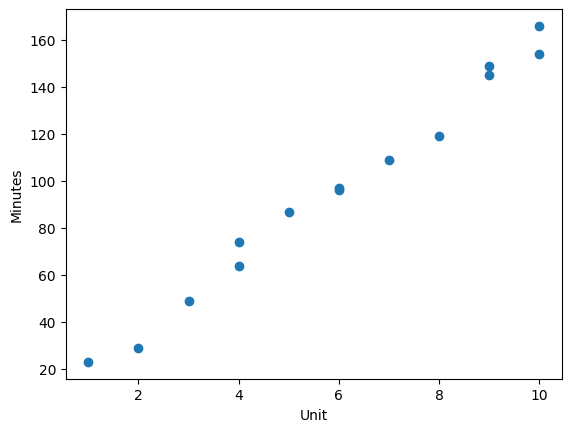

In [30]:
plt.scatter(computers['Units'],computers['Minutes'])
plt.xlabel('Unit')
plt.ylabel('Minutes')

In [31]:
model0=computers['Minutes'].mean()

In [32]:
model1= 10 + 12 * computers['Units']


In [33]:
model2 = 6+18*computers['Units']

In [34]:
computers['model_0'] = model0
computers['model_1'] = model1
computers['model_2'] = model2

In [35]:
computers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Units    14 non-null     int64  
 1   Minutes  14 non-null     int64  
 2   model_0  14 non-null     float64
 3   model_1  14 non-null     int64  
 4   model_2  14 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 692.0 bytes


In [36]:
computers

,Units,Minutes,model_0,model_1,model_2
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


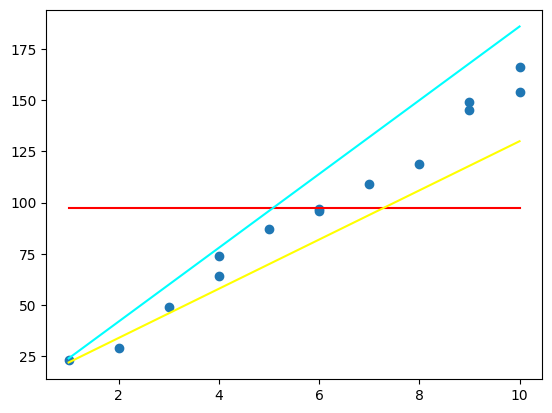

In [37]:
fig,ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data=computers, label="actual repair time")
ax.plot(computers['Units'],computers['model_0'],color="red",label = 'model_0')
ax.plot(computers['Units'],computers['model_1'],color="yellow",label = 'model_1')
ax.plot(computers['Units'],computers['model_2'],color="cyan",label = 'model_2')

Build Regression model using Scikit-Learn Library

In [38]:
x= computers[['Units']]
y=computers['Minutes']
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(x,y)
print("Intercept",model3.intercept_)
print("Coeffiecient",model3.coef_)

Intercept 4.161654135338296
Coeffiecient [15.50877193]


In [39]:
model_3 = 4.16 +15.60*computers['Units']

computers['model_3'] = model_3

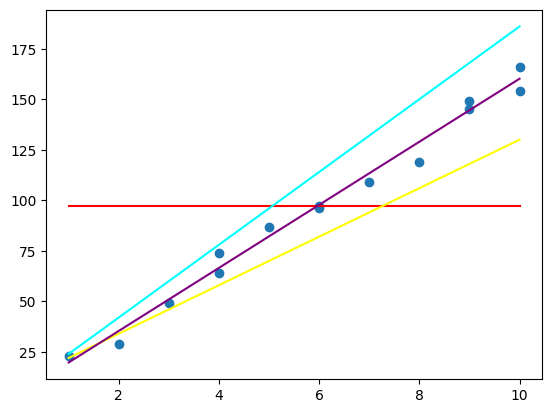

In [40]:
fig,ax=plt.subplots()
ax.scatter(x='Units',y='Minutes',data=computers, label="actual repair time")
ax.plot(computers['Units'],computers['model_0'],color="red",label = 'model_0')
ax.plot(computers['Units'],computers['model_1'],color="yellow",label = 'model_1')
ax.plot(computers['Units'],computers['model_2'],color="cyan",label = 'model_2')
ax.plot(computers['Units'],computers['model_3'],color="purple",label = 'model_3')

In [41]:
rsq = model3.score(computers[['Units']],y)*100

In [42]:
rsq

98.74371980620737

Tutorial 5:Multiple Linear Regression Model

In [43]:
student = pd.read_csv('./data/std_marks_data.csv')
student

,hours,age,internet,marks
0,6.84,15,0,78.64
1,6.56,20,1,88.80
2,NaN,21,1,88.90
3,8.67,22,1,98.99
4,7.55,17,1,92.34
...,...,...,...,...
295,2.99,25,0,43.45
296,6.55,15,1,77.74
297,0.00,20,1,75.76
298,9.90,22,0,99.99


In [44]:
student.isna().sum()

hours       12
age          0
internet     0
marks        0
dtype: int64

In [45]:
student.hours=student.hours.fillna(student.hours.mean())

In [46]:
x=student.iloc[:,:-1]

In [47]:
x

,hours,age,internet
0,6.840000,15,0
1,6.560000,20,1
2,5.494514,21,1
3,8.670000,22,1
4,7.550000,17,1
...,...,...,...
295,2.990000,25,0
296,6.550000,15,1
297,0.000000,20,1
298,9.900000,22,0


In [48]:
y=student.iloc[:,-1]
y

0      78.64
1      88.80
2      88.90
3      98.99
4      92.34
       ...  
295    43.45
296    77.74
297    75.76
298    99.99
299    99.99
Name: marks, Length: 300, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [52]:
hours=float(input("Enter the number of hours studied: "))
age=int(input("Enter the age of the student: "))
internet=int(input("Enter 1 if student has internet access else enter 0: "))

data=[[hours,age,internet]]
predicted_marks=model.predict(data)
print("The predicted marks for the student is:",predicted_marks[0])

The predicted marks for the student is: 104.14307143697576


c:\Users\yashk\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Exercise 3: Build Logistic Regression Model

Consider a coronary heart disease dataset (chd_data.csv) which lists the age in years ('age') and the presence/absence of evidence of significant coronary heart disease ('chd') for 100 patients.

The variable chd = 0 indicates the absence of coronary heart disease, whereas chd=1 indicates the presence of coronary heart disease.

Import dataset and visualize the data to get an insight on building the model.
Importing the required class
Specifying the columns as predictor and target variable
Split the data in training and test set in 70:30 ratio.
Built model using sklearn.linear_model.LogisticRegression class.
Train the model using the training data.
Fetch the intercept and the coefficients of the model.
Creating sample data.
Predicting the probabilities for each of the class labels.
Evaluate the model's performance on training and test data using 'accuracy' measure.

In [ ]:
import pandas as pd
chd = pd.read_csv('./data/chd_data.csv')


,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0
...,...,...
95,63,1
96,64,1
97,64,0
98,65,1


In [3]:
chd.head()

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


In [4]:
chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     100 non-null    int64
 1   chd     100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


Text(0.5, 1.0, 'age vs Cornary Heart Disease')

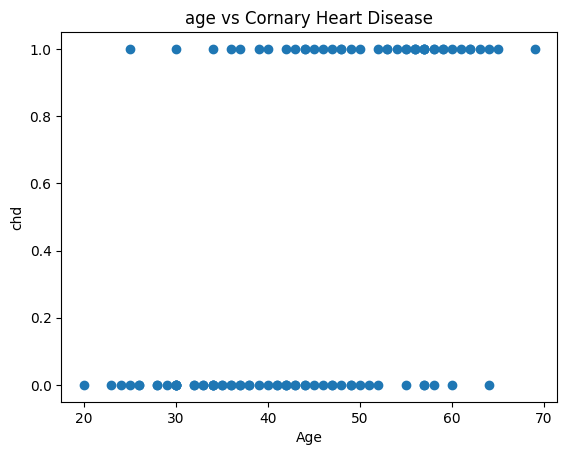

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter("age","chd",data=chd)
plt.xlabel("Age")
plt.ylabel("chd")
plt.title("age vs Cornary Heart Disease")


In [7]:
from sklearn.model_selection import train_test_split
predictors = ["age"]
target = ["chd"]
X =chd[["age"]]
y = chd[["chd"]]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print("Shape of X_train:",X_train.shape)

print("Shape of y_train:",y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)



Shape of X_train: (70, 1)
Shape of y_train: (70, 1)
Shape of X_test: (30, 1)
Shape of y_test: (30, 1)


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
print("Model Trained Successfully")
print("intercept:",model.intercept_ , "\n Coefficient:",model.coef_)

Model Trained Successfully
intercept: [-5.6511192] 
 Coefficient: [[0.11144141]]


c:\Users\yashk\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
test = int(input("Enter age to predict CHD: "))
data =[[test]]
model.predict_proba(data)

c:\Users\yashk\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.96479915, 0.03520085]])

In [16]:
model.score(X_test,y_test)


0.7333333333333333

In [15]:
model.score(X_train ,y_train)

0.7428571428571429